In [2]:
from sklearn import datasets

In [3]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:,:2]

In [5]:
import sys
import matplotlib
import pandas
import sklearn
import scipy

In [9]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url,names=names)

In [12]:
print(dataset.shape)

(150, 5)


In [14]:
print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [15]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [16]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


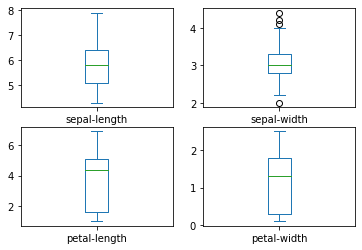

In [18]:
dataset.plot(kind = 'box',subplots = True , layout = (2,2), sharex = False,sharey = False)
plt.show()

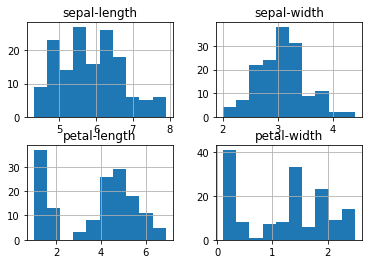

In [19]:
dataset.hist()
plt.show()


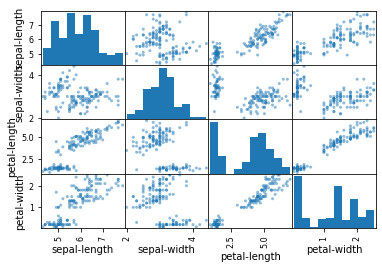

In [20]:
scatter_matrix(dataset)
plt.show()

In [21]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train,X_test,Y_train,Y_test= model_selection.train_test_split(X,Y,test_size = validation_size,random_state =seed)


In [22]:
seed = 6
scoring = 'accuracy'


In [33]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

results=[]
names=[]

for name,model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle= True,random_state = seed)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR : 0.958333 (0.041667)
LDA : 0.975000 (0.038188)
KNN : 0.958333 (0.041667)
CART : 0.941667 (0.053359)
NB : 0.966667 (0.040825)
SVM : 0.941667 (0.053359)


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values


In [6]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)
num=0
den=0

for i in range(n):
    num+=(X[i]-mean_x)*(Y[i]-mean_y)
    den+=(X[i]-mean_x)**2
m=num/den
c=mean_y-m*mean_x

print(m,c)

0.26342933948939945 325.57342104944223


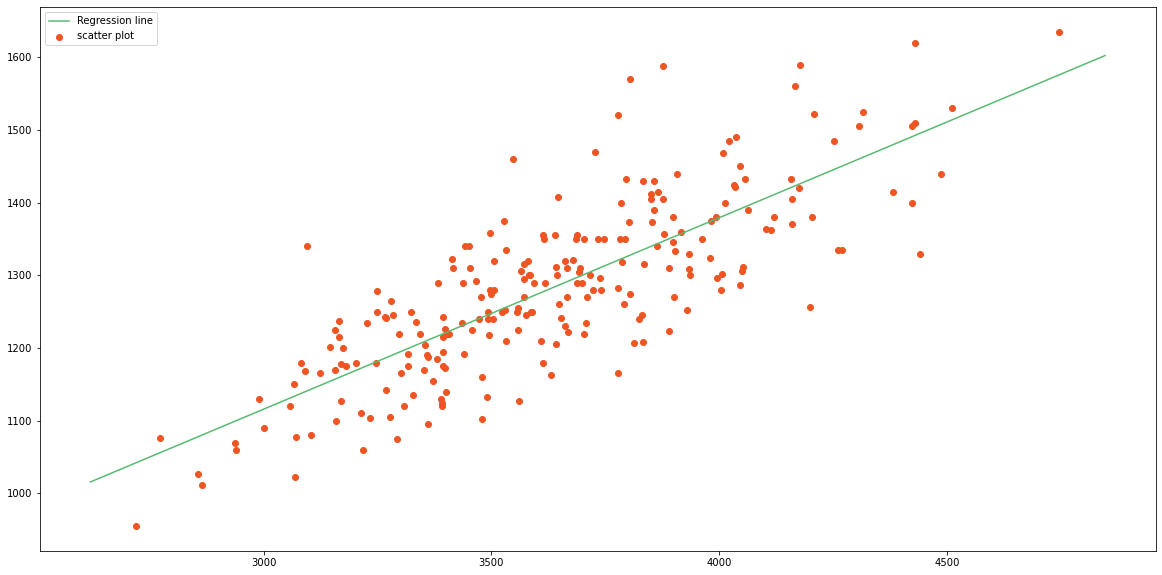

In [11]:
max_x = np.max(X)+100
min_x = np.min(X)-100

x = np.linspace(min_x,max_x,100)
y = m*x + c

plt.plot(x,y, color = '#58b970',label = 'Regression line')
plt.scatter(X,Y,color = '#ef5423',label = 'scatter plot')
plt.legend()
plt.show()

0.639311719957


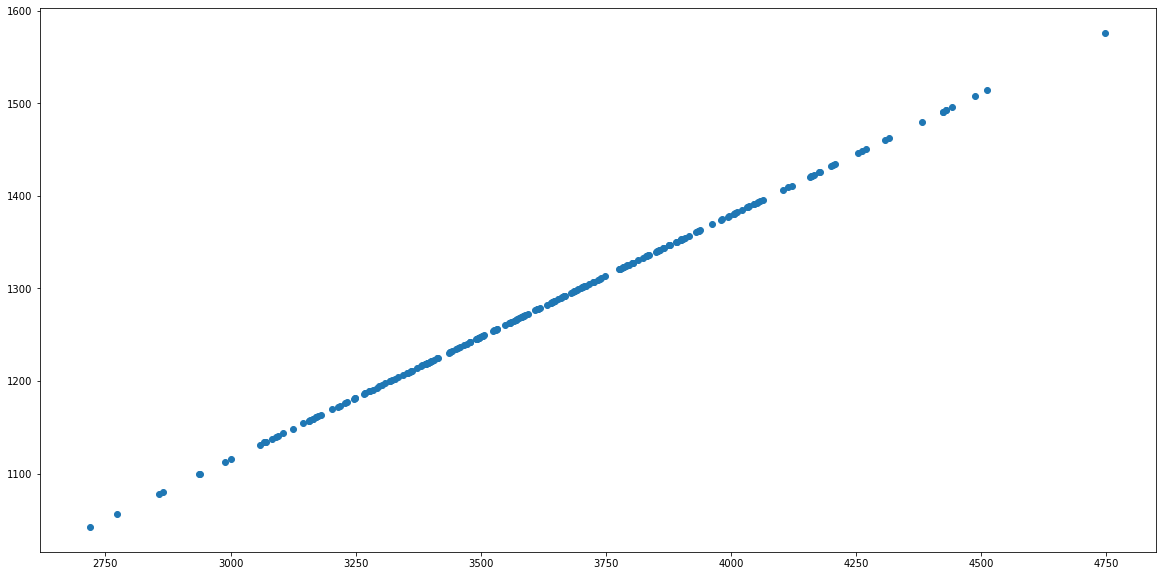

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n,1))

reg = LinearRegression()

reg = reg.fit(X,Y)

Y_pred = reg.predict(X)

r2 = reg.score(X,Y)

print(r2)
plt.scatter(X,Y_pred)
plt.show()
